In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('laptops_10.csv', encoding='latin-1')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


In [1]:
#pip install matplotlib

     ---------------------------------------- 0.0/162.6 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.6 kB ? eta -:--:--
     --------- --------------------------- 41.0/162.6 kB 653.6 kB/s eta 0:00:01
     ----------------------------------- -- 153.6/162.6 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 162.6/162.6 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.6 MB 14.2 MB/s eta 0:00:01
   --- ------------------------------------ 0.6/7.6 MB 9.7 MB/s eta 0:00:01
   ----- ---------------------------------- 1.0/7.6 MB 9.4 MB/s eta 0:00:01
   --------- ------------------------------ 1.8/7.6 MB 12.6 MB/s eta 0:00:01
   ------------- -------------------------- 2.6/7.6 MB 11.6 MB/s eta 0:00:01
   ---------------- ----------------------- 3.1/7.6 MB 11.7 MB/s eta 0:00:01
   ------------------ --------------------- 3.6/7.6 MB 11.0 MB/s eta 0:00:01
   ----

Text(0, 0.5, 'count')

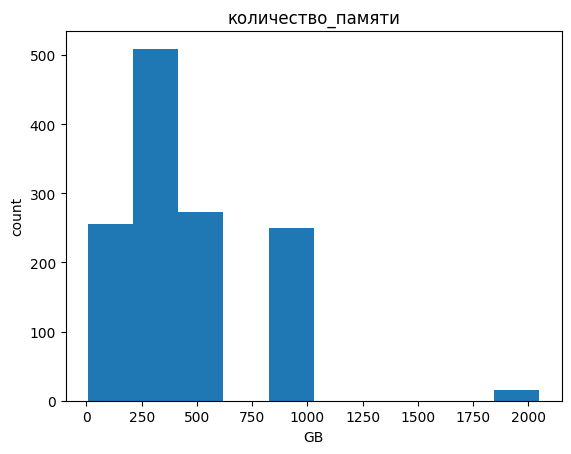

In [5]:
plt.hist(df['Memory_Amount'])
plt.title('количество_памяти')
plt.xlabel('GB')
plt.ylabel('count')

Text(0, 0.5, 'count')

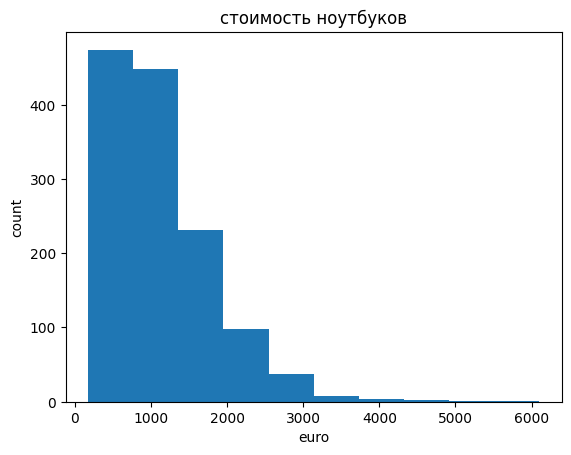

In [6]:
plt.hist(df['Price_euros'])
plt.title('стоимость ноутбуков')
plt.xlabel('euro')
plt.ylabel('count')

Text(0, 0.5, 'count')

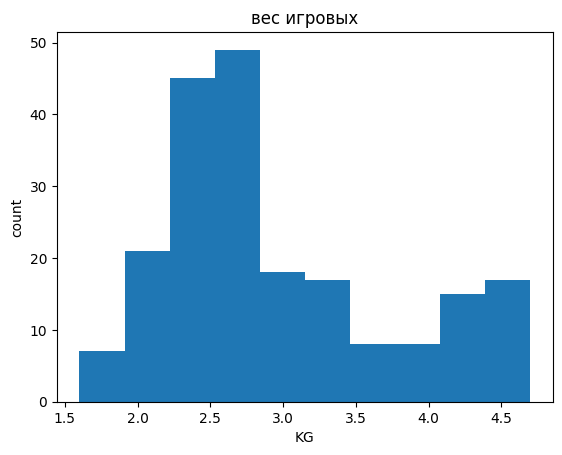

In [8]:
plt.hist(df['Weight'][df['TypeName'] == 'Gaming'])
plt.title('вес игровых')
plt.xlabel('KG')
plt.ylabel('count')

In [9]:
data = df['Memory_Type'].value_counts()
data

Memory_Type
SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: count, dtype: int64

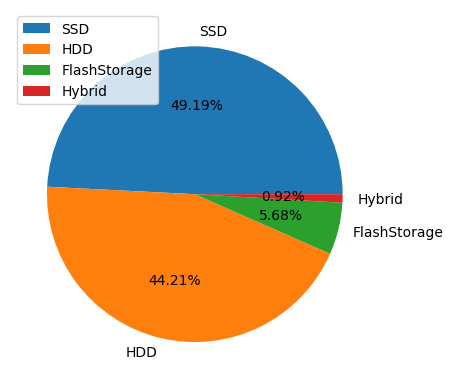

In [11]:
plt.pie(data.values, labels=data.index, autopct='%1.2f%%')
plt.legend(data.index)

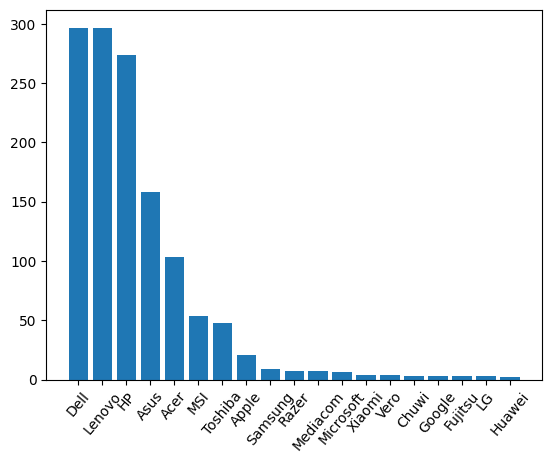

In [15]:
data = df['Company'].value_counts()
plt.bar(data.index, data.values)
plt.xticks(rotation=50);
plt.rc('xtick', labelsize=25)

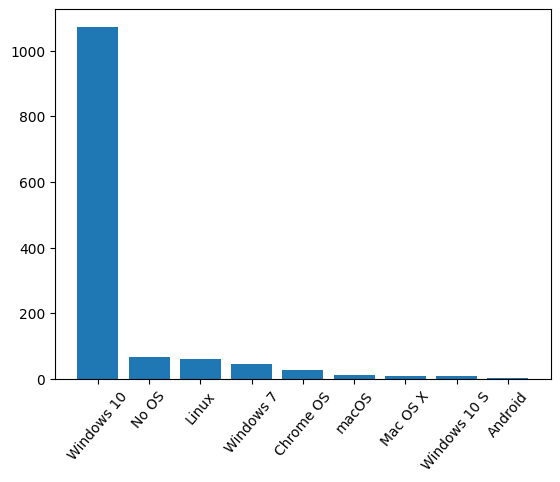

In [18]:
data = df['OpSys'].value_counts()
plt.bar(data.index, data.values)
plt.xticks(rotation=50);
plt.rc('xtick', labelsize=8)

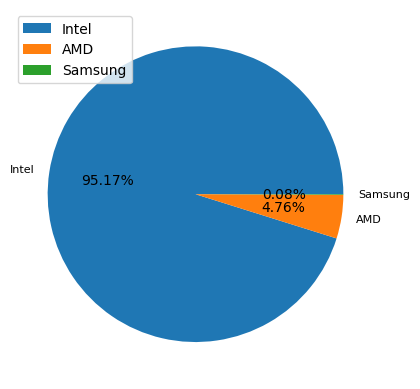

In [20]:
data = df['Cpu_Company'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%1.2f%%')
plt.legend(data.index)

In [24]:
data = pd.crosstab(df['Company'], df['Cpu_Company'])
data = data.drop(columns='Samsung').reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


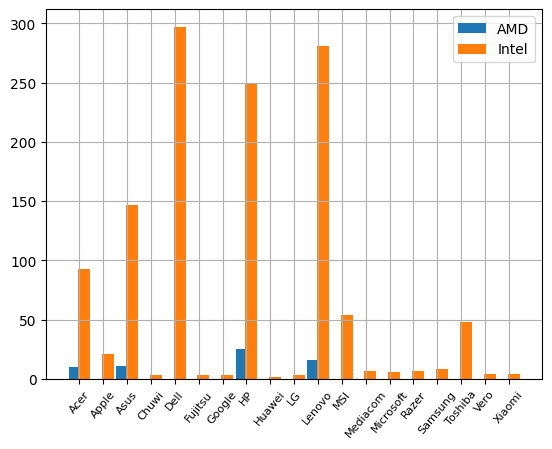

In [34]:
import numpy as np

n_ticks = np.arange(len(data))

plt.bar(n_ticks - 0.2, data['AMD'], width=0.5)
plt.bar(n_ticks + 0.2, data['Intel'], width=0.5)
plt.legend(['AMD', 'Intel'])
plt.grid()
plt.xticks(n_ticks, data['Company'], rotation=50);

In [35]:
data = pd.crosstab(df['Company'], df['Cpu_Company'], normalize= 'index')
data = data.drop(columns='Samsung').reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
7,HP,0.091241,0.908759
8,Huawei,0.000000,1.000000
9,LG,0.000000,1.000000


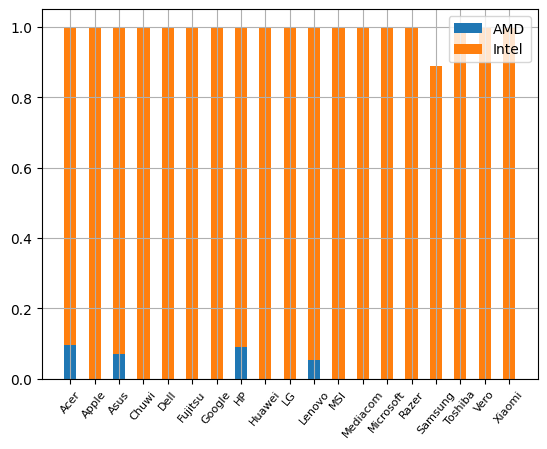

In [37]:

plt.bar(data['Company'], data['AMD'], width=0.5)
plt.bar(data['Company'], data['Intel'], width=0.5, bottom=data['AMD'])
plt.legend(['AMD', 'Intel'])
plt.grid()
plt.xticks(rotation=50);

In [39]:
#pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/294.9 kB 162.5 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 465.5 kB/s eta 0:00:01
   ------------------------------------ --- 266.2/294.9 kB 1.6 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='Price_euros', ylabel='Cpu_Company'>

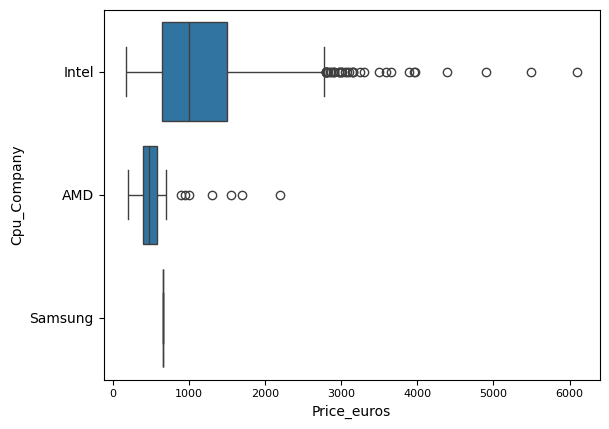

In [40]:
import seaborn as sns

sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'])